## Generating Visualization of the emoloyee data 

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import pwd 

In [2]:
import pandas as pd

In [3]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [4]:
# construct statement to connect to database
sql_stmt='postgresql://postgres:' + pwd.password + '/sql_employee_db'

In [5]:
# Create an engine for the database
engine=create_engine(sql_stmt)

In [6]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['titles', 'employees', 'departments', 'dept_manager', 'dept_emp', 'salaries']

In [7]:
# Make connection to DB
connection = engine.connect()

## Analyse the Database


In [8]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('employees')
for column in columns:
    print(column["name"], column["type"])

emp_no INTEGER
emp_title_id VARCHAR
birth_date DATE
first_name VARCHAR
last_name VARCHAR
sex VARCHAR
hire_date DATE


In [9]:
columns = inspector.get_columns('titles')
for column in columns:
    print(column["name"], column["type"])

title_id VARCHAR
title VARCHAR


In [10]:
columns = inspector.get_columns('departments')
for column in columns:
    print(column["name"], column["type"])

dept_no VARCHAR
dept_name VARCHAR


In [11]:
columns = inspector.get_columns('dept_manager')
for column in columns:
    print(column["name"], column["type"])

dept_no VARCHAR
emp_no INTEGER


In [12]:
columns = inspector.get_columns('dept_emp')
for column in columns:
    print(column["name"], column["type"])

emp_no INTEGER
dept_no VARCHAR


In [13]:
columns = inspector.get_columns('salaries')
for column in columns:
    print(column["name"], column["type"])

emp_no INTEGER
salary INTEGER


In [14]:
engine.execute('select * from employees')

In [15]:
engine.execute('SELECT ROUND(AVG(s.salary),2) as average_salary, t.title FROM employees e INNER JOIN salaries s ON s.emp_no = e.emp_no INNER JOIN titles t ON t.title_id = e.emp_title_id group by t.title').fetchall()

[(Decimal('48564.43'), 'Assistant Engineer'),
 (Decimal('48535.34'), 'Engineer'),
 (Decimal('51531.04'), 'Manager'),
 (Decimal('48506.80'), 'Senior Engineer'),
 (Decimal('58550.17'), 'Senior Staff'),
 (Decimal('58465.38'), 'Staff'),
 (Decimal('48582.90'), 'Technique Leader')]

In [16]:
salaries=pd.read_sql('SELECT * FROM salaries', connection )
salaries.head()
dept_salary = pd.read_sql('SELECT ROUND(AVG(s.salary),2) as average_salary, t.title FROM employees e INNER JOIN salaries s ON s.emp_no = e.emp_no  INNER JOIN titles t ON t.title_id = e.emp_title_id group by t.title', connection)
dept_salary



,average_salary,title
0,48564.43,Assistant Engineer
1,48535.34,Engineer
2,51531.04,Manager
3,48506.80,Senior Engineer
4,58550.17,Senior Staff
5,58465.38,Staff
6,48582.90,Technique Leader


Text(0.5, 1.0, 'Average Salary of Employees by Department')

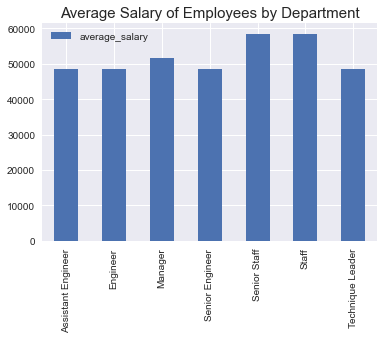

In [17]:
# bar chart of salaries of employees by department
fig, ax = plt.subplots()
dept_salary.plot.bar(ax=ax)
tick_idx = plt.xticks()[0]
year_labels = dept_salary.title[tick_idx].values
ax.xaxis.set_ticklabels(year_labels)
plt.title("Average Salary of Employees by Department", size=15)

In [18]:

emp_salary = pd.read_sql('SELECT e.emp_no, s.salary FROM employees e INNER JOIN salaries s ON s.emp_no = e.emp_no  INNER JOIN titles t ON t.title_id = e.emp_title_id', connection)
emp_salary.head()


,emp_no,salary
0,57444,48973
1,13616,40000
2,240129,43548
3,427958,63377
4,35916,40000


Text(0.5, 1.0, 'Salary Range of employees')

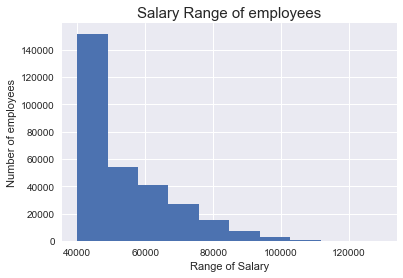

In [19]:
#Hist of employee salary
emp_salary.hist(column='salary')
plt.xlabel('Range of Salary')
plt.ylabel('Number of employees')
plt.title("Salary Range of employees", size=15)